Bu çalışmada bazı verilerin şeker hastalığına etkisini inceledik ve bu verilere dayanarak hastanın şeker hastası olup olmadığını tahmin eden bir model kurduk.



In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
diabetes=pd.read_csv('diabetes.csv')
df=diabetes.copy()

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


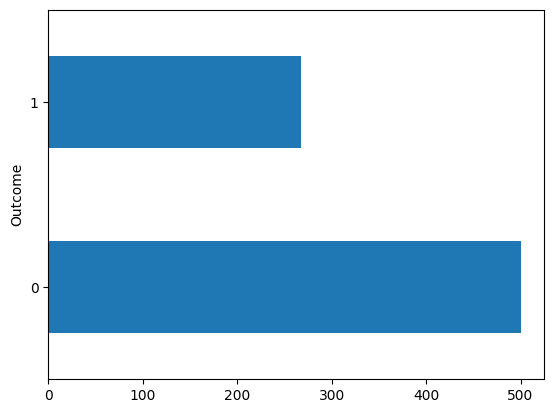

In [10]:
df["Outcome"].value_counts().plot.barh();

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [28]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.30,
                                                    random_state=42)

LogisticRegression

In [33]:
from sklearn.linear_model import LogisticRegression
lojreg=LogisticRegression()
lojreg=lojreg.fit(X_train,y_train)
lojreg

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
lojreg.predict(X_test)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1])

In [36]:
y_pred = lojreg.predict(X_test)

In [37]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_test,y_pred))

0.5096471914376255

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve

accuracy_score(y_test, y_pred)

0.7402597402597403

KNN

In [48]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier().fit(X_train, y_train)
knn_model

KNeighborsClassifier()

In [44]:
knn_model.predict(X_test)[0:10]

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 1])

In [45]:
y_pred = knn_model.predict(X_test)

In [46]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.5582905262390825

In [47]:
accuracy_score(y_test, y_pred)

0.6883116883116883

Random Forests

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
rf_model = RandomForestClassifier().fit(X_train, y_train)
rf_model

RandomForestClassifier()

In [52]:
rf_model.predict(X_test)[0:10]

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 1])

In [53]:
y_pred = rf_model.predict(X_test)

In [54]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.496742636335202

In [55]:
accuracy_score(y_test, y_pred)

0.7532467532467533

In [ ]:
# logistic regression, knn ve random forest uyguladık
# Bu 3 model arasından en düşük hatayı ve en yüksek isabet oranını random forest ile yakalamış olduk